# Objetivo del Notebook

El principal objetivo a llevar a cabo en este Jupyter Notebook, no es otro que llevar a cabo el proceso de visualizacion y representacion de los datos de mi dataset.

La visualizacion de los datos mediante graficos de Matplotlib y Seaborn pueden ayudar, en conjunto con el analisis previamente realizado, a la comprension y posterior procesamiento del conjunto de datos del que disponemos.

# Importar las librerias a utilizar

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Instancio un objeto DataFrame con el conjunto de datos
dataset_route = '../data/raw/cardio_train.csv'
cardio_df = pd.read_csv(dataset_route, sep = ';', index_col = 'id')

# Muestro los primeros 10 ejemplos del conjunto de datos
cardio_df.head(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
8,21914,1,151,67.0,120,80,2,2,0,0,0,0
9,22113,1,157,93.0,130,80,3,1,0,0,1,0
12,22584,2,178,95.0,130,90,3,3,0,0,1,1
13,17668,1,158,71.0,110,70,1,1,0,0,1,0


In [4]:
# Muestro un DataFrame de resumen del conjunto de datos.
cardio_df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## Histogramas de registros

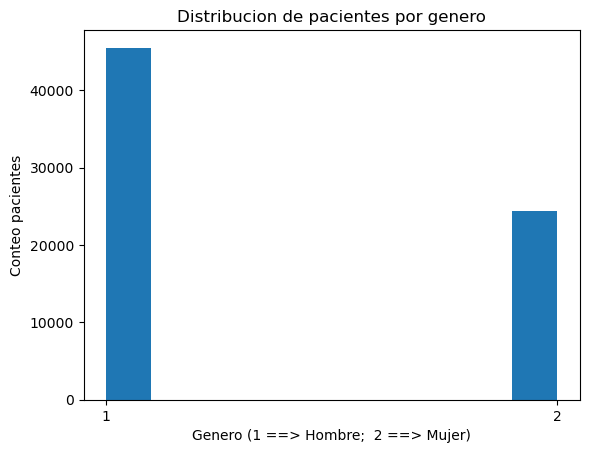

In [14]:
## Columna Gender
plt.hist(cardio_df['gender'])
plt.title("Distribucion de pacientes por genero")
plt.xlabel("Genero (1 ==> Hombre;  2 ==> Mujer)")
plt.ylabel("Conteo pacientes")

plt.xticks(range(1, 3, 1))
plt.show()

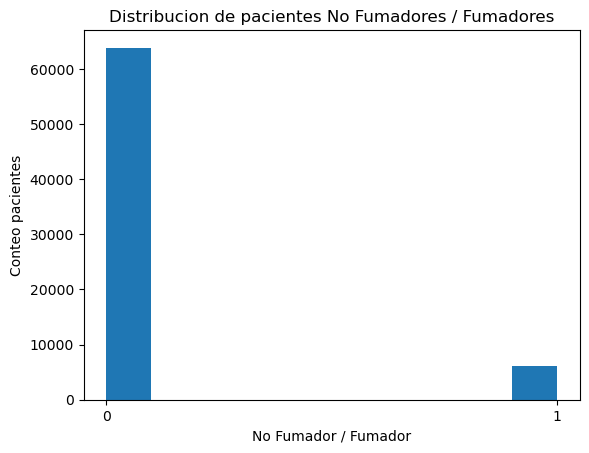

In [20]:
## Pacientes fumadores
plt.hist(cardio_df['smoke'])
plt.title("Distribucion de pacientes No Fumadores / Fumadores")
plt.xlabel("No Fumador / Fumador")
plt.ylabel("Conteo pacientes")

plt.xticks(range(0, 2, 1))
plt.show()

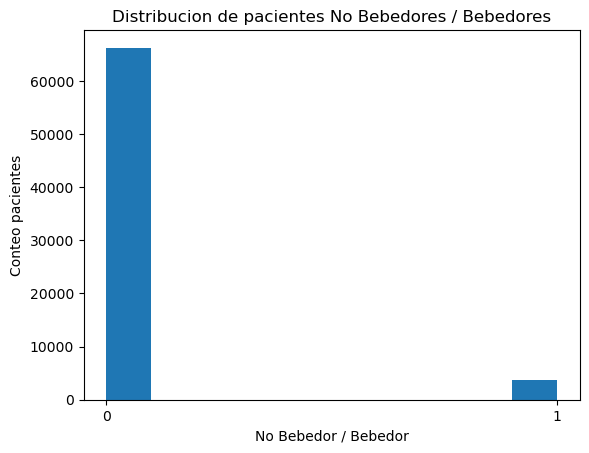

In [22]:
## Pacientes bebedores habituales
plt.hist(cardio_df['alco'])
plt.title("Distribucion de pacientes No Bebedores / Bebedores")
plt.xlabel("No Bebedor / Bebedor")
plt.ylabel("Conteo pacientes")

plt.xticks(range(0, 2, 1))
plt.show()

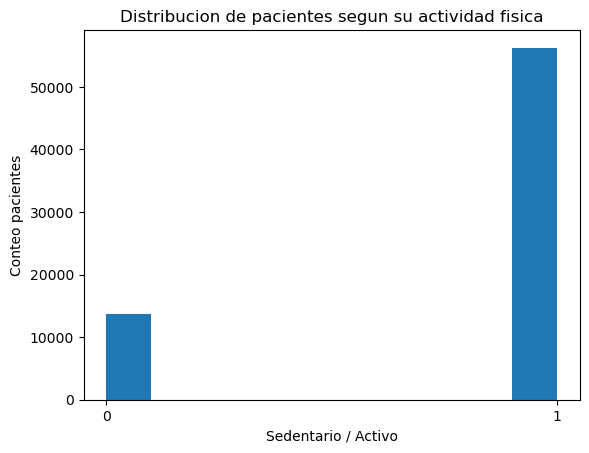

In [24]:
## Pacientes segun su actividad
plt.hist(cardio_df['active'])
plt.title("Distribucion de pacientes segun su actividad fisica")
plt.xlabel("Sedentario / Activo")
plt.ylabel("Conteo pacientes")

plt.xticks(range(0, 2, 1))
plt.show()

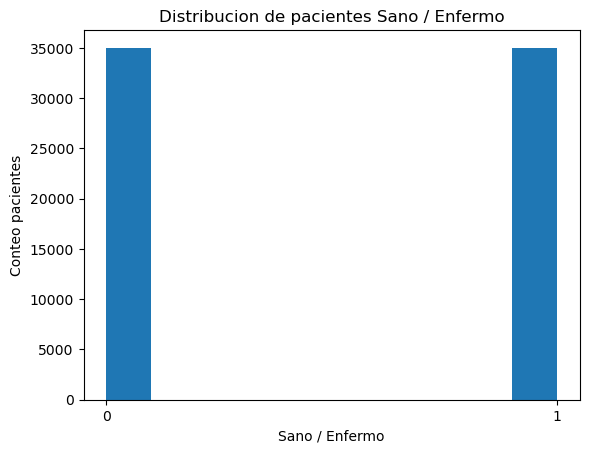

In [26]:
## Pacientes enfermos
plt.hist(cardio_df['cardio'])
plt.title("Distribucion de pacientes Sano / Enfermo")
plt.xlabel("Sano / Enfermo")
plt.ylabel("Conteo pacientes")

plt.xticks(range(0, 2, 1))
plt.show()

## Correlacion

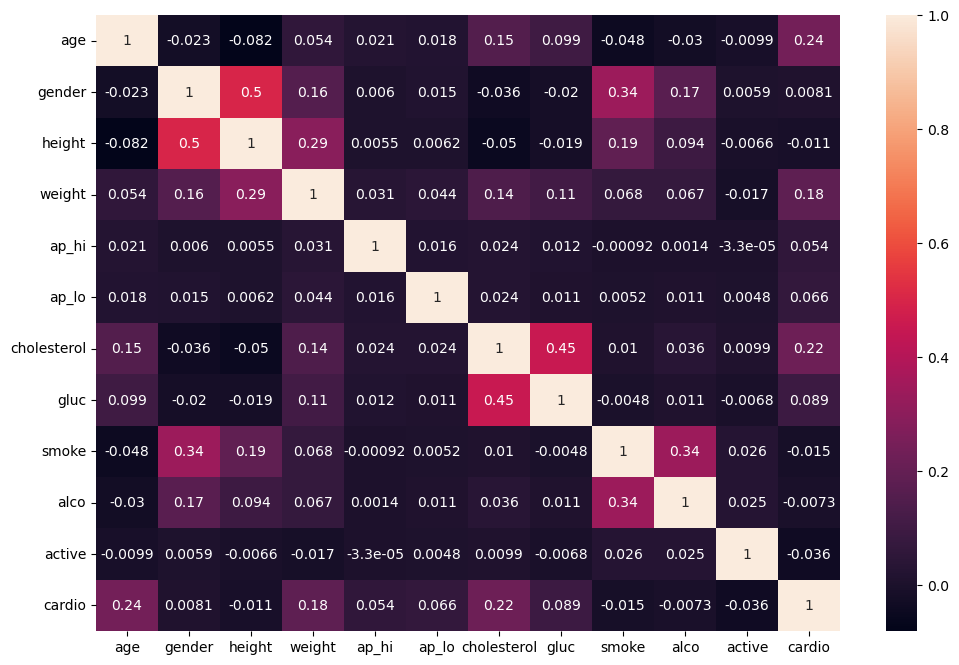

In [5]:
# Genero un mapa de calor que muestre los coeficientes de correlacion entre las diferentes variables del conjunto de datos.

corr_matrix = cardio_df.corr()

plt.figure(figsize = (12, 8))
sns.heatmap(corr_matrix, annot = True)

plt.show()

La correlacion es una metrica que nos indica un valor numerico, comprendido entre [-1, +1], que representa la relacion lineal existente entre dos variables.
Es bastante util para poder analizar que variables tienen una mayor implicacion en el resultado recogido por la variable dependiente, y cuales de las variables del dataset
no tienen gran relacion con esta variable objetivo.

En muchos casos, trabajar nuestro modelo teniendo en cuenta la correlacion entre variables puede sernos bastante util (sobretodo, en modelos lineales) al momento de definir una matriz de caracteristicas para construir un modelo.

Por otro lado, es conveniente no incluir en una misma matriz de caracteristicas, variables que mantengan un coeficiente de correlacion demasiado elevado entre si. Esto puede hacer que, realmente, esten aportando la misma informacion a nuestro modelo, por lo que al incluir grupos de variables de este estilo, estamos aumentando la complejidad de nuestro modelo, sin obtener un valor real añadido.

## Boxplot de variables

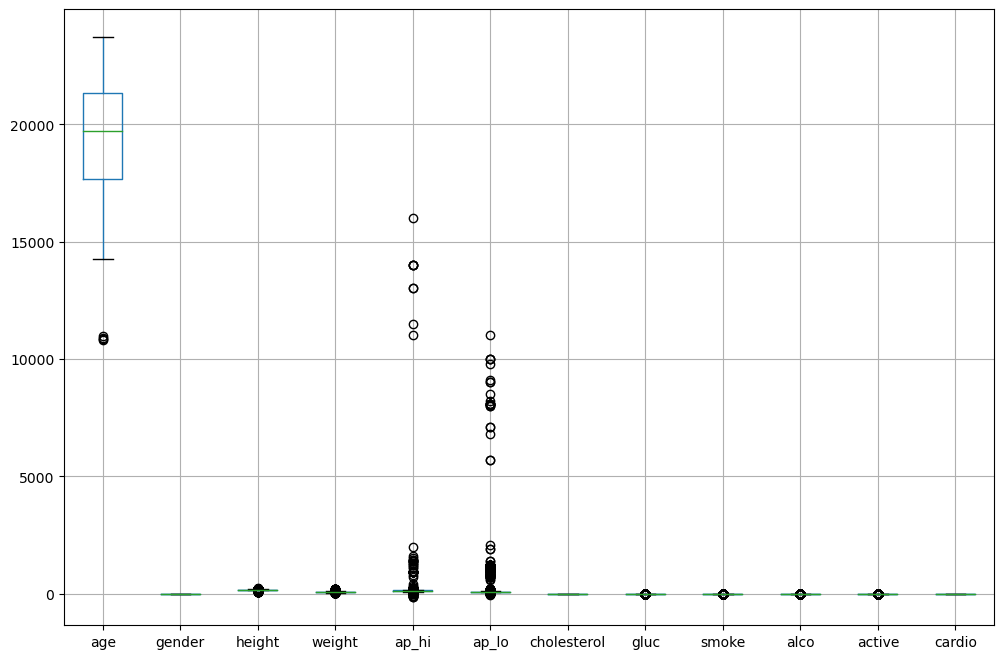

In [7]:
plt.figure(figsize = (12, 8))
cardio_df.boxplot()

plt.show()

Los graficos BoxPlot (cajas y bigotes) son muy utiles para visualizar la distribucion de los datos en los diferentes cuartiles de valores recogidos. Ademas, destacan de forma clara la presencia de outliers en cada una de las columnas, en caso de haberlos.

En este caso, podemos ver como existen outliers en las columnas 'age', 'ap_hi', y 'ap_lo'. Por otro lado, el resto de columnas muestran tambien outliers, pero no de una manera tan evidente como ocurre con las columnas mencionadas. En este caso, una vez se procesen los datos, se mostrara un nuevo BoxPlot con las distribuciones ya normalizadas.

## Pairplot


C:\Users\David\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


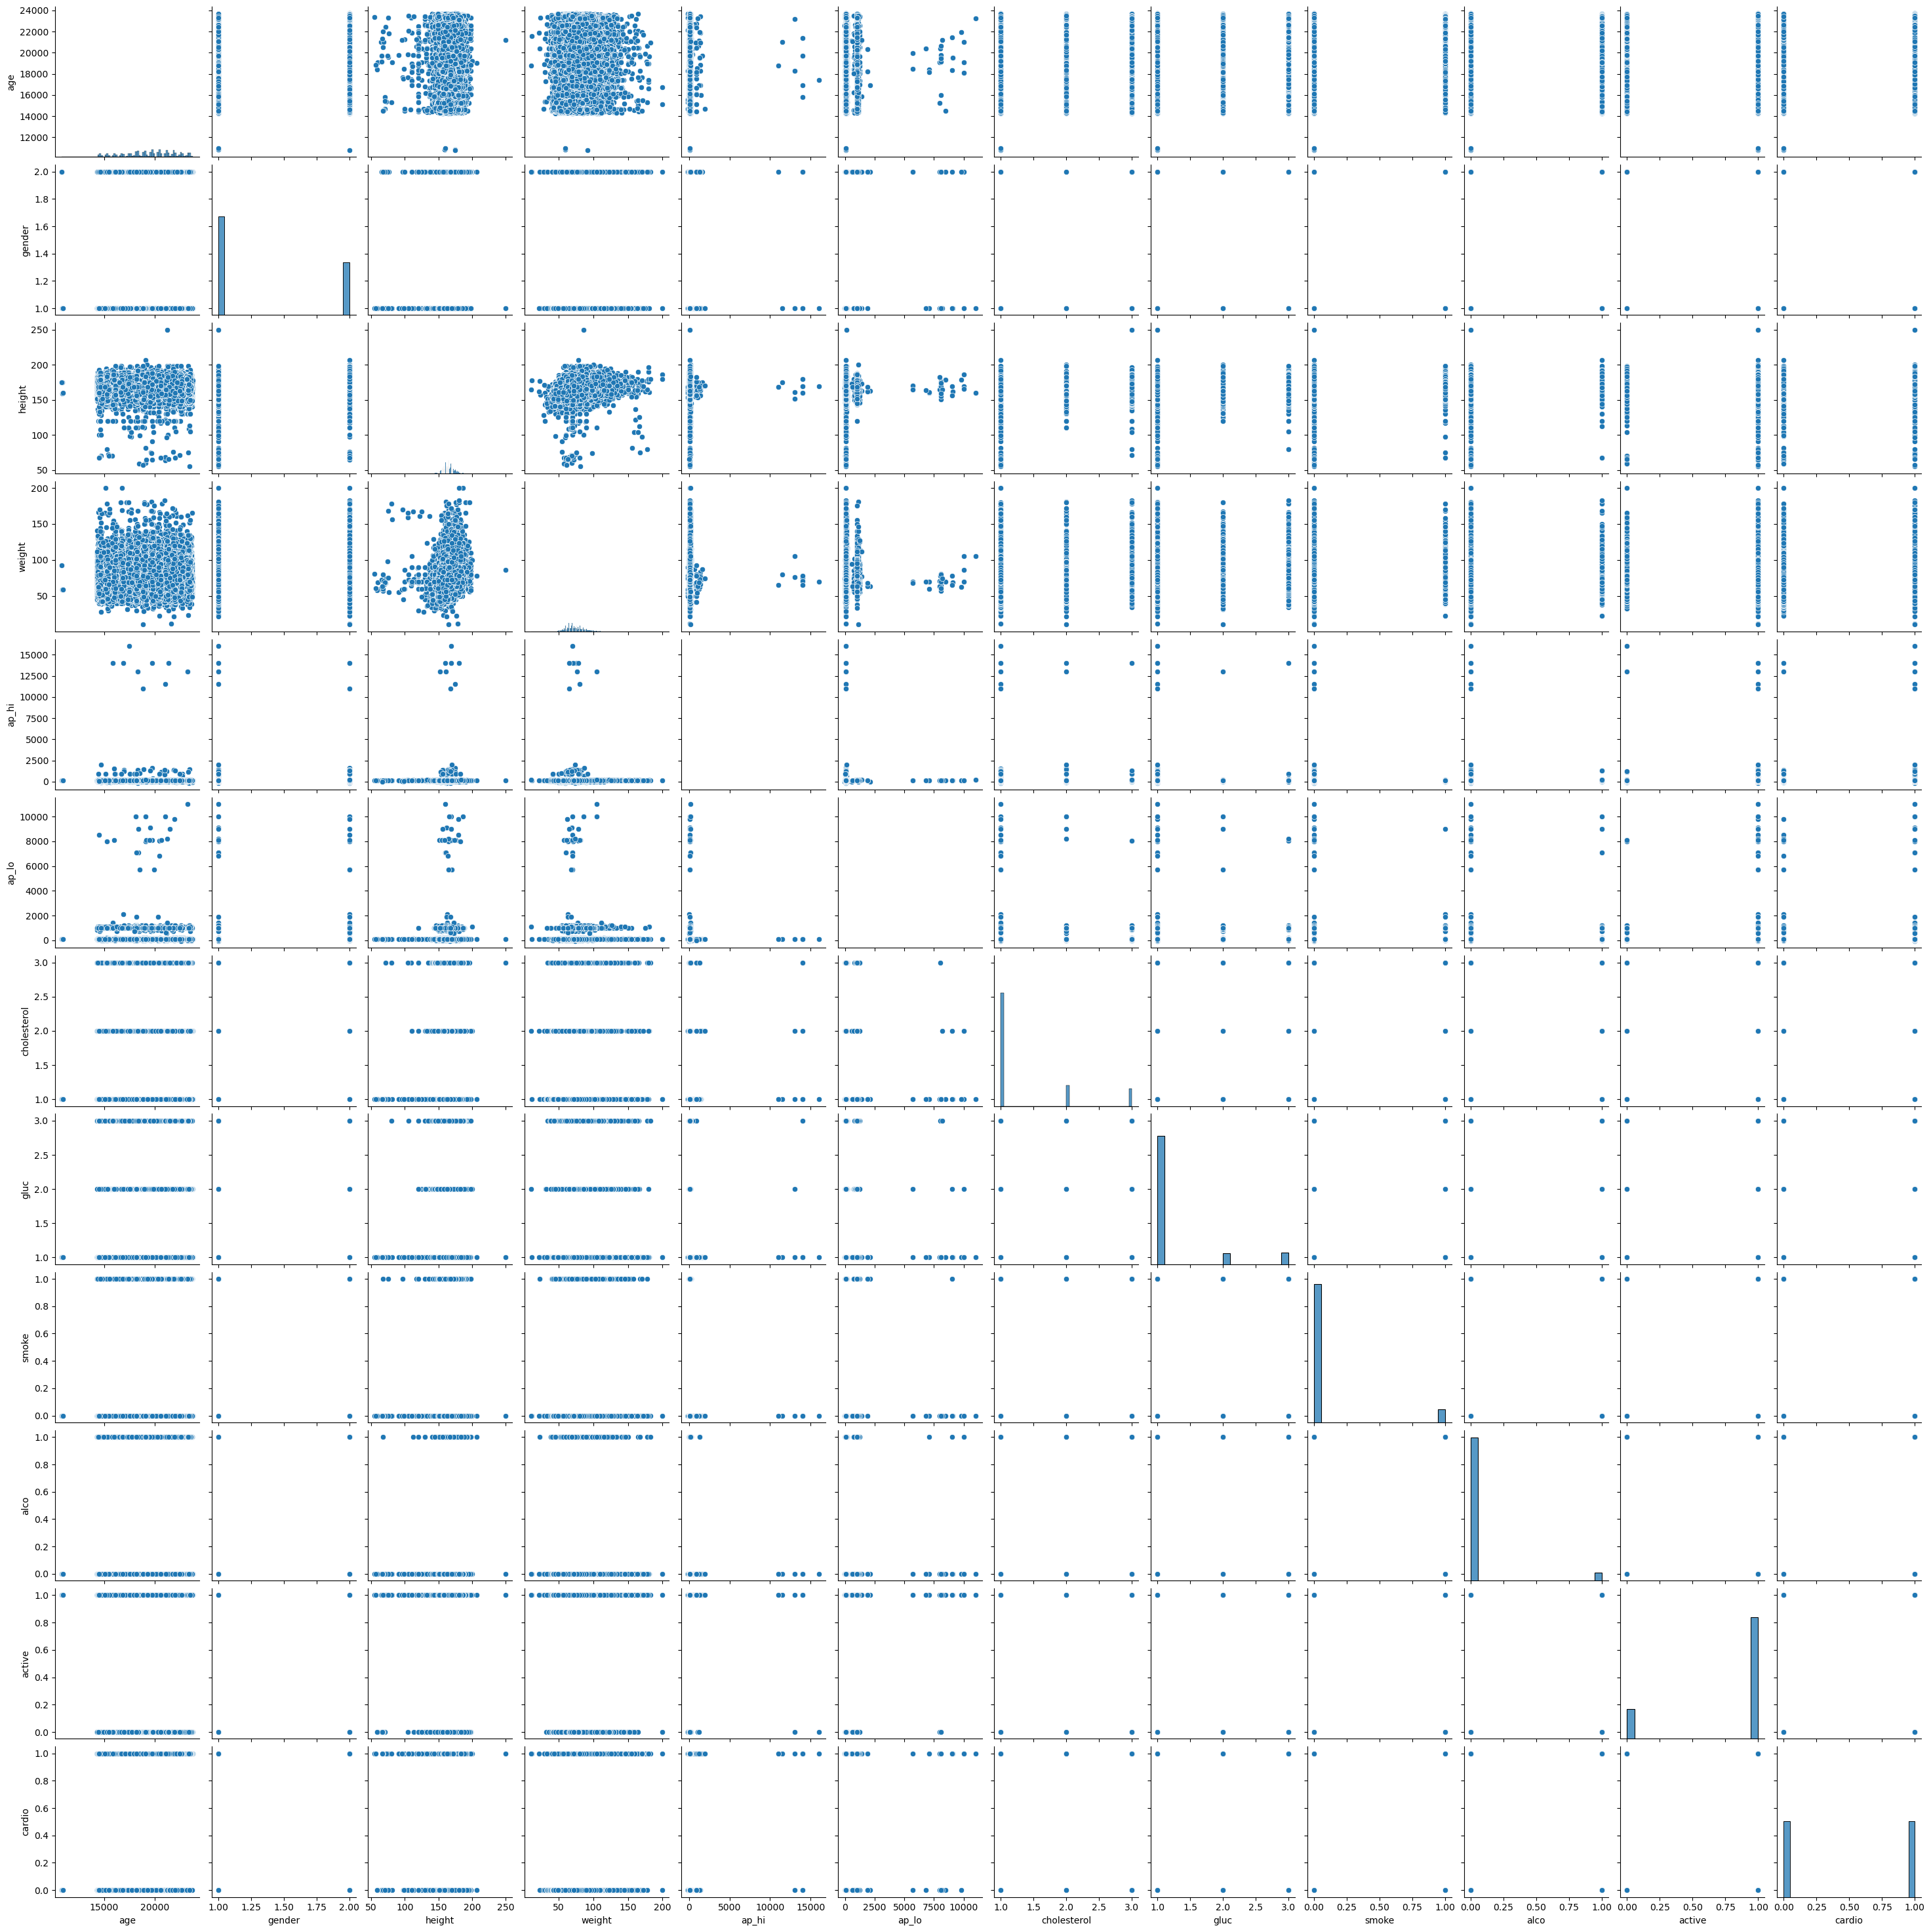

In [8]:
sns.pairplot(cardio_df)

C:\Users\David\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


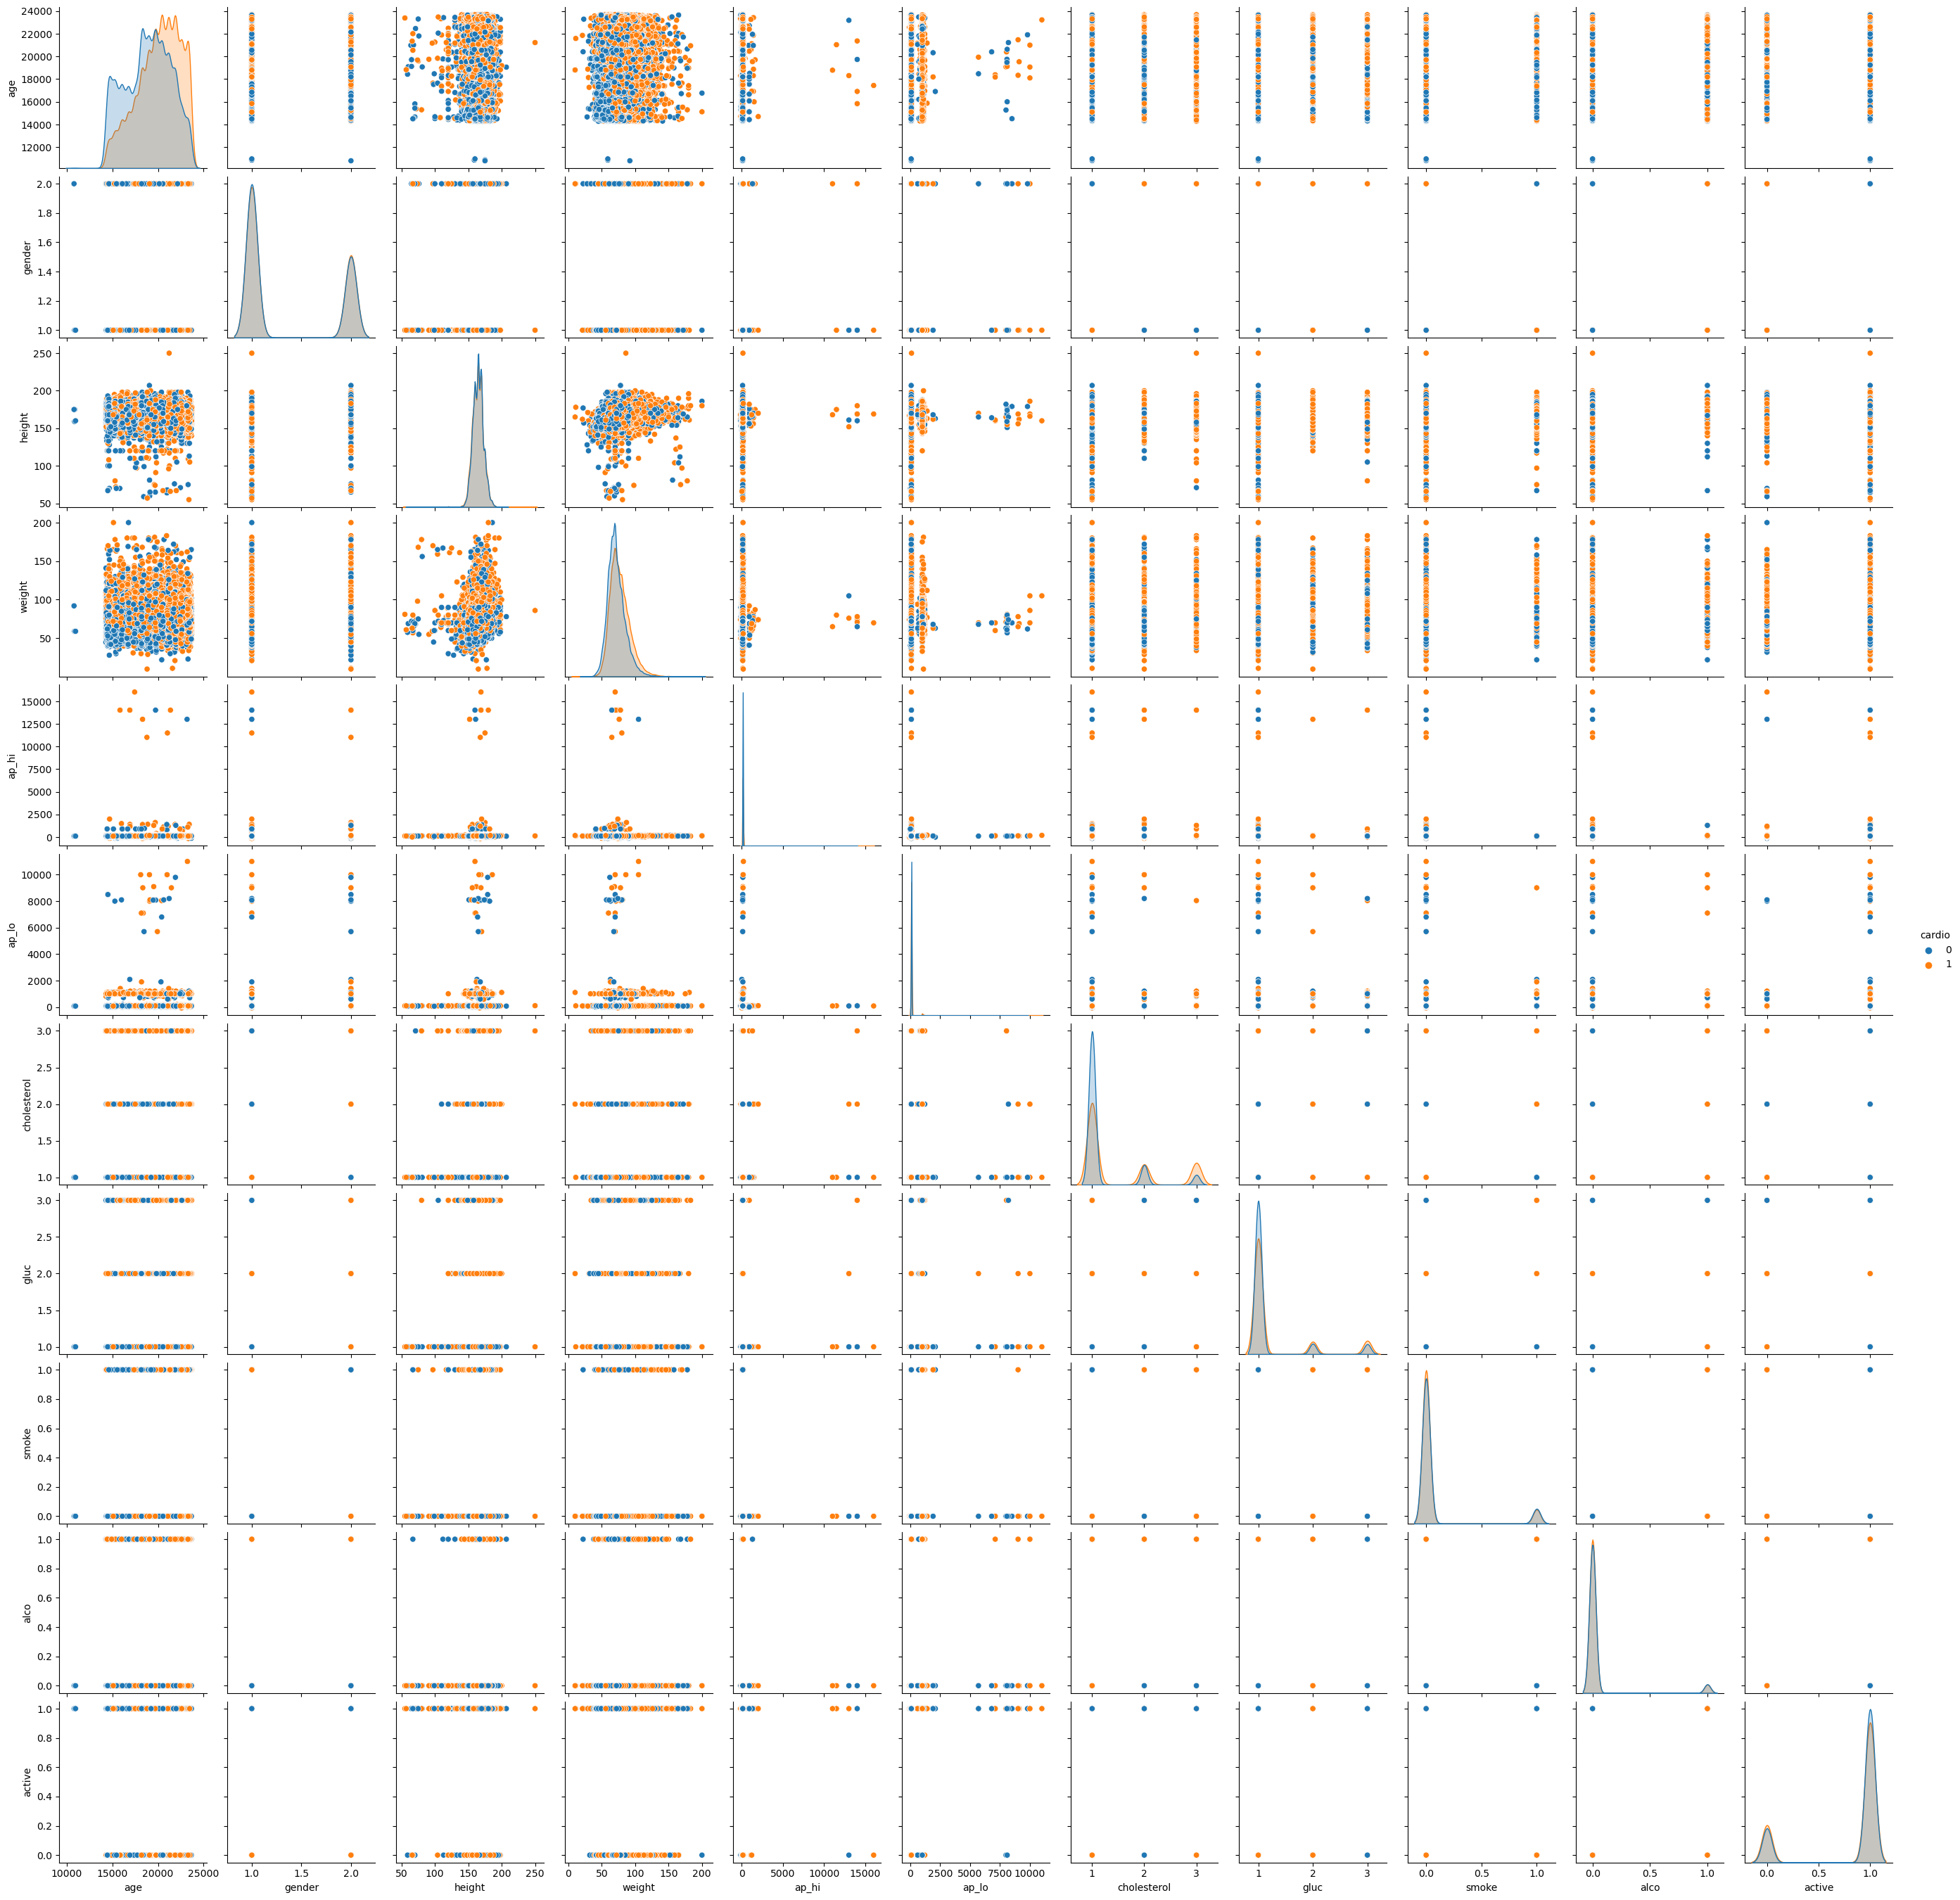

In [9]:
sns.pairplot(cardio_df, hue = 'cardio')

Visualizar los graficos generados por Pairplot asignando como matiz ('hue') la varaible dependiente, permite visualizar algunos patrones en los datos registrados:

* **Edad**. La distribucion de pacientes con problemas cardiacos comienza a aumentar notablemente, hasta alcanzar picos maximos, a medida que aumenta el valor de la columna en cuestion. Esto nos indica como pacientes con mayor edad son mas propensos a sufrir enfermedades cardiacas.

* **Colesterol**. Parece ser que encontramos pacientes que han registrado la presencia de enfermedades cardiacas en todos los valores posibles de la columna [1, 2, 3]. Sin embargo, parece que el numero de pacientes enfermos es mayor en los aquellos casos en los que se ha registrado el valor 1 para esta columna (colesterol normal).

* **Genero**. El conjunto de datos registra ejemplos de pacientes hombre y mujer. En este caso, el numero de pacientes hombre (1), es mayor que el numero de pacientes mujer (2). Ademas, se muestra como la proporcion de pacientes sanos y enfermos para cada uno de los casos, es practicamente la misma (por cada 1000 pacientes hombres sanos, el dataset registra cerca de 1000 pacientes hombres enfermos).